In [5]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to c:\users\pancham\appdata\local\temp\pip-req-build-6f3uh_yu
  Resolved https://github.com/huggingface/transformers.git to commit 730a440734e1fb47c903c17e3231dac18e3e5fd6
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for transformers: filename=transformers-4.42.0.dev0-py3-none-any.whl size=9176250 sha256=eaae9a7180266b0aa7896d1c1281fc4b4ecc76314a89f63a14158704f1d03711
  Stored in directory: C:\Users\Pancham\AppData\Local\Temp\pip-ephem-wheel-cache-7m4otikx\wheels\05\0a\97\64ae47c27ba95fae2cb5838e7b4b7247a34d4a8ba5f7092de2
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformer

  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git 'C:\Users\Pancham\AppData\Local\Temp\pip-req-build-6f3uh_yu'


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from pylab import rcParams

In [7]:
rcParams['figure.figsize'] = 10, 5

In [8]:
zeroshot_classifier = pipeline("zero-shot-classification", model='microsoft/Phi-3-mini-4k-instruct')

ValueError: Could not load model microsoft/Phi-3-mini-4k-instruct with any of the following classes: (<class 'transformers.models.auto.modeling_tf_auto.TFAutoModelForSequenceClassification'>,). See the original errors:

while loading with TFAutoModelForSequenceClassification, an error is thrown:
Traceback (most recent call last):
  File "c:\Users\Pancham\Desktop\Projects\phi3_zeroshot\venv\lib\site-packages\transformers\pipelines\base.py", line 283, in infer_framework_load_model
    model = model_class.from_pretrained(model, **kwargs)
  File "c:\Users\Pancham\Desktop\Projects\phi3_zeroshot\venv\lib\site-packages\transformers\models\auto\auto_factory.py", line 566, in from_pretrained
    )
ValueError: Unrecognized configuration class <class 'transformers.models.phi3.configuration_phi3.Phi3Config'> for this kind of AutoModel: TFAutoModelForSequenceClassification.
Model type should be one of AlbertConfig, BartConfig, BertConfig, CamembertConfig, ConvBertConfig, CTRLConfig, DebertaConfig, DebertaV2Config, DistilBertConfig, ElectraConfig, EsmConfig, FlaubertConfig, FunnelConfig, GPT2Config, GPT2Config, GPTJConfig, LayoutLMConfig, LayoutLMv3Config, LongformerConfig, MobileBertConfig, MPNetConfig, OpenAIGPTConfig, RemBertConfig, RobertaConfig, RobertaPreLayerNormConfig, RoFormerConfig, TapasConfig, TransfoXLConfig, XLMConfig, XLMRobertaConfig, XLNetConfig.




In [9]:
text_generator = pipeline("text-generation", model='microsoft/Phi-3-mini-4k-instruct')

ValueError: Could not load model microsoft/Phi-3-mini-4k-instruct with any of the following classes: (<class 'transformers.models.auto.modeling_tf_auto.TFAutoModelForCausalLM'>,). See the original errors:

while loading with TFAutoModelForCausalLM, an error is thrown:
Traceback (most recent call last):
  File "c:\Users\Pancham\Desktop\Projects\phi3_zeroshot\venv\lib\site-packages\transformers\pipelines\base.py", line 283, in infer_framework_load_model
    model = model_class.from_pretrained(model, **kwargs)
  File "c:\Users\Pancham\Desktop\Projects\phi3_zeroshot\venv\lib\site-packages\transformers\models\auto\auto_factory.py", line 566, in from_pretrained
    )
ValueError: Unrecognized configuration class <class 'transformers.models.phi3.configuration_phi3.Phi3Config'> for this kind of AutoModel: TFAutoModelForCausalLM.
Model type should be one of BertConfig, CamembertConfig, CTRLConfig, GPT2Config, GPT2Config, GPTJConfig, OpenAIGPTConfig, OPTConfig, RemBertConfig, RobertaConfig, RobertaPreLayerNormConfig, RoFormerConfig, TransfoXLConfig, XGLMConfig, XLMConfig, XLMRobertaConfig, XLNetConfig.




In [19]:
results = zeroshot_classifier(
    sequences = "i dont know why, but i am happy",
    candidate_labels = [
    "joy",
    "sadness",
    "anger",
    "fear",
    "surprise",
    "disgust",
    "trust",
    "anticipation",
    "love",
    "guilt",
    "shame",
    "pride",
    "relief",
    "gratitude",
    "envy",
    "boredom",
    "contentment",
    "loneliness",
    "embarrassment",
    "curiosity"
    ],
    multi_label = True
    )

contentment: 0.9981309771537781
joy: 0.9908097386360168
relief: 0.8763625621795654
surprise: 0.8054536581039429
curiosity: 0.7903785705566406
gratitude: 0.7776213884353638
trust: 0.6137059330940247


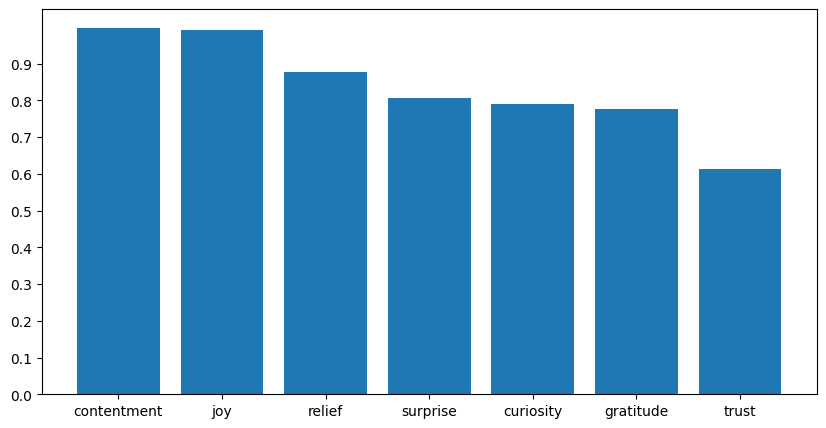

: 

In [20]:
filtered_results = {label: score for label, score in zip(results['labels'], results['scores']) if score > 0.6}
for label, score in filtered_results.items():
    print(f"{label}: {score}")

plt.bar(filtered_results.keys(), filtered_results.values())
plt.yticks(list(np.arange(0, 1, 0.1)))
plt.show()